In [98]:
import pandas as pd
import numpy as np

import plotly.express as px

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [99]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [100]:
df = pd.read_csv('students_data.csv')
df.head()

,Schüler-ID,Alter,Geschlecht,Ethnizität,Bildung_der_Eltern,Lernzeit_pro_Woche,Fehlzeiten,Nachhilfe,Unterstützung_durch_Eltern,Extracurricular,Sports,Musik,Ehrenamt,Notendurchschnitt,Note
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.070804,3.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.957085,2.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.887398,5.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.945782,4.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,3.711939,5.0


In [101]:
df.shape

(2392, 15)

In [102]:
df.describe()

,Schüler-ID,Alter,Geschlecht,Ethnizität,Bildung_der_Eltern,Lernzeit_pro_Woche,Fehlzeiten,Nachhilfe,Unterstützung_durch_Eltern,Extracurricular,Sports,Musik,Ehrenamt,Notendurchschnitt,Note
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,3.093814,3.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.377784,3.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.106607,5.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,3.825197,5.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000


In [103]:
correlation_matrix = df.corr()
correlation_matrix

,Schüler-ID,Alter,Geschlecht,Ethnizität,Bildung_der_Eltern,Lernzeit_pro_Woche,Fehlzeiten,Nachhilfe,Unterstützung_durch_Eltern,Extracurricular,Sports,Musik,Ehrenamt,Notendurchschnitt,Note
Schüler-ID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,0.002697,-0.098500
Alter,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,-0.000275,-0.006250
Geschlecht,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,0.013360,0.022998
Ethnizität,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,-0.027760,-0.023326
Bildung_der_Eltern,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,0.035854,0.041031
Lernzeit_pro_Woche,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,-0.179275,-0.134131
Fehlzeiten,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,0.919314,0.728633
Nachhilfe,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,-0.145119,-0.111695
Unterstützung_durch_Eltern,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,-0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,-0.094078,-0.069733


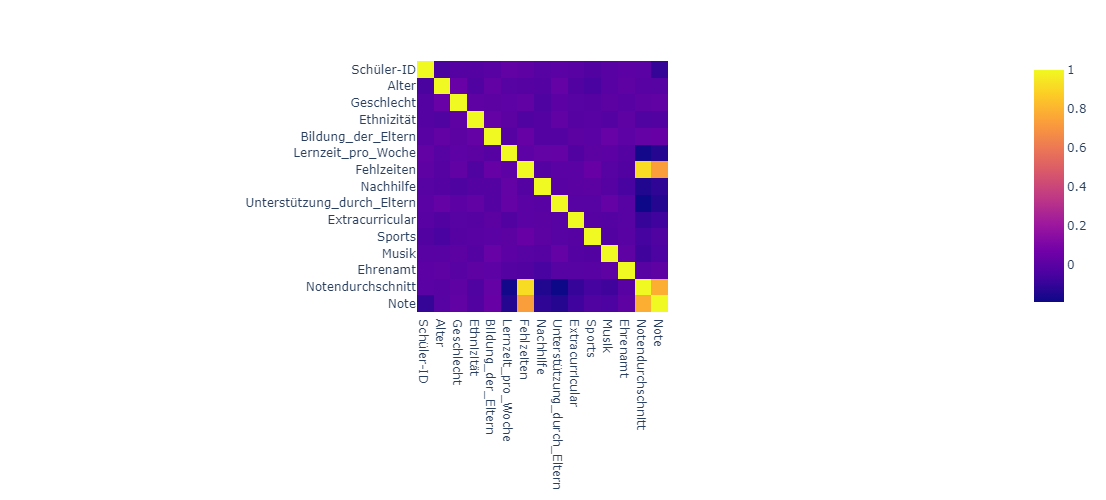

In [104]:
fig = px.imshow(correlation_matrix)
fig.update_layout(height=500)
fig.show()

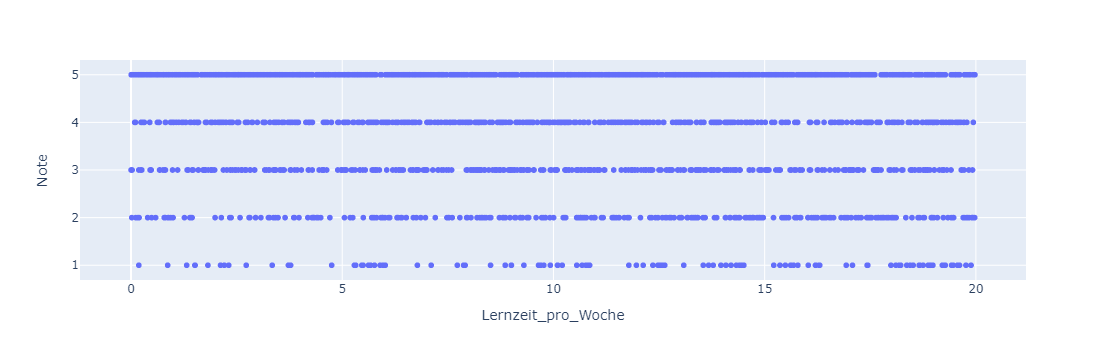

In [105]:
fig = px.scatter(df, x='Lernzeit_pro_Woche', y='Note')
fig.show()

## Einfache lineare Regression

#### Nicht skaliert

In [106]:
X = sm.add_constant(df['Lernzeit_pro_Woche'])  
y = df['Note']  
model_1a = sm.OLS(y, X).fit()
print(model_1a.summary())

                            OLS Regression Results                            
Dep. Variable:                   Note   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     43.79
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           4.51e-11
Time:                        07:40:14   Log-Likelihood:                -3874.7
No. Observations:                2392   AIC:                             7753.
Df Residuals:                    2390   BIC:                             7765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.2698      0

#### Skaliert

In [107]:
scaler = StandardScaler()
df['Lernzeit_pro_Woche_scaled'] = scaler.fit_transform(df[['Lernzeit_pro_Woche']])

X_scaled = sm.add_constant(df['Lernzeit_pro_Woche_scaled'])
model_1b = sm.OLS(y, X_scaled).fit()
print(model_1b.summary())

                            OLS Regression Results                            
Dep. Variable:                   Note   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     43.79
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           4.51e-11
Time:                        07:40:15   Log-Likelihood:                -3874.7
No. Observations:                2392   AIC:                             7753.
Df Residuals:                    2390   BIC:                             7765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Multiple lineare Regression

#### Nicht skaliert

In [108]:
X = sm.add_constant(df[['Lernzeit_pro_Woche', 'Fehlzeiten', 'Unterstützung_durch_Eltern']])
model_2a = sm.OLS(y, X).fit()
print(model_2a.summary())

                            OLS Regression Results                            
Dep. Variable:                   Note   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1049.
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:40:17   Log-Likelihood:                -2891.0
No. Observations:                2392   AIC:                             5790.
Df Residuals:                    2388   BIC:                             5813.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Skaliert

In [109]:
scaler = StandardScaler()
df['Fehlzeiten_scaled'] = scaler.fit_transform(df[['Fehlzeiten']])
df['Unterstützung_durch_Eltern_scaled'] = scaler.fit_transform(df[['Unterstützung_durch_Eltern']])

X_scaled = sm.add_constant(df[['Lernzeit_pro_Woche_scaled', 'Fehlzeiten_scaled', 'Unterstützung_durch_Eltern_scaled']])
model_2b = sm.OLS(y, X_scaled).fit()
print(model_2b.summary())

                            OLS Regression Results                            
Dep. Variable:                   Note   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     1049.
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:40:19   Log-Likelihood:                -2891.0
No. Observations:                2392   AIC:                             5790.
Df Residuals:                    2388   BIC:                             5813.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Logistische Regression

#### Nicht skaliert

In [110]:
df['Note_besser_als_2'] = (df['Note'] > 2.0).astype(int)

X = sm.add_constant(df[['Lernzeit_pro_Woche', 'Fehlzeiten', 'Unterstützung_durch_Eltern']])
y_binary = df['Note_besser_als_2']
model_3a = sm.Logit(y_binary, X).fit()
print(model_3a.summary())

Optimization terminated successfully.
         Current function value: 0.282961
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:      Note_besser_als_2   No. Observations:                 2392
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.3495
Time:                        07:40:20   Log-Likelihood:                -676.84
converged:                       True   LL-Null:                       -1040.5
Covariance Type:            nonrobust   LLR p-value:                2.564e-157
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.2591      0.214      5.894      0.000      

#### Skaliert

In [111]:
X_scaled = sm.add_constant(df[['Lernzeit_pro_Woche_scaled', 'Fehlzeiten_scaled', 'Unterstützung_durch_Eltern_scaled']])
model_3b = sm.Logit(y_binary, X_scaled).fit()
print(model_3b.summary())

Optimization terminated successfully.
         Current function value: 0.282961
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:      Note_besser_als_2   No. Observations:                 2392
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                            3
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.3495
Time:                        07:40:21   Log-Likelihood:                -676.84
converged:                       True   LL-Null:                       -1040.5
Covariance Type:            nonrobust   LLR p-value:                2.564e-157
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 2.9286      0.126     23

## Lasso Regression

#### Nicht skaliert

In [129]:
df = pd.read_csv('students_data.csv')
X = sm.add_constant(df.drop(columns=['Note','Schüler-ID'])) 
model_4a = sm.OLS(y, X).fit_regularized(method='elastic_net', L1_wt=1, alpha=0.04, refit=True)
print(model_4a.summary())

                            OLS Regression Results                            
Dep. Variable:                   Note   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     544.5
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        07:42:30   Log-Likelihood:                -2864.8
No. Observations:                2392   AIC:                             5744.
Df Residuals:                    2386   BIC:                             5784.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Skaliert

In [140]:
df = pd.read_csv('students_data.csv')
df_to_scale = df.drop(columns=['Note', 'Schüler-ID'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_scale)
df_scaled = pd.DataFrame(scaled_data, index=df.index, columns=[col + '_scaled' for col in df_to_scale.columns])

In [141]:
df.head()

,Schüler-ID,Alter,Geschlecht,Ethnizität,Bildung_der_Eltern,Lernzeit_pro_Woche,Fehlzeiten,Nachhilfe,Unterstützung_durch_Eltern,Extracurricular,Sports,Musik,Ehrenamt,Notendurchschnitt,Note
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.070804,3.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.957085,2.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.887398,5.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.945782,4.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,3.711939,5.0


In [142]:
df_scaled.head()

,Alter_scaled,Geschlecht_scaled,Ethnizität_scaled,Bildung_der_Eltern_scaled,Lernzeit_pro_Woche_scaled,Fehlzeiten_scaled,Nachhilfe_scaled,Unterstützung_durch_Eltern_scaled,Extracurricular_scaled,Sports_scaled,Musik_scaled,Ehrenamt_scaled,Notendurchschnitt_scaled
0,0.472919,0.978492,-0.853391,0.253711,1.780336,-0.890822,1.522371,-0.108744,-0.788476,-0.660132,2.019544,-0.431866,-1.118086
1,1.362944,-1.021981,-0.853391,-0.746087,0.997376,-1.717694,-0.656870,-0.999551,-0.788476,-0.660132,-0.495161,-0.431866,-1.242374
2,-1.307132,-1.021981,1.091641,1.253509,-0.984045,1.353542,-0.656870,-0.108744,-0.788476,-0.660132,-0.495161,-0.431866,1.960277
3,0.472919,0.978492,-0.853391,1.253509,0.045445,-0.063951,-0.656870,0.782063,1.268269,-0.660132,-0.495161,-0.431866,-0.161790
4,0.472919,0.978492,-0.853391,0.253711,-0.902311,0.290422,1.522371,0.782063,-0.788476,-0.660132,-0.495161,-0.431866,0.675573


In [143]:
X_scaled = sm.add_constant(df_scaled) 
y = df['Note']  
model_4b = sm.OLS(y, X_scaled).fit_regularized(method='elastic_net', L1_wt=1, alpha=0.01, refit=True)
print(model_4b.summary())

                            OLS Regression Results                            
Dep. Variable:                   Note   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     758.7
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:05:46   Log-Likelihood:                -2758.5
No. Observations:                2392   AIC:                             5529.
Df Residuals:                    2387   BIC:                             5564.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [135]:
df = pd.read_csv('students_data.csv')
df_to_scale = df.drop(columns=['Note', 'Schüler-ID'])
non_scaled_cols = ['Geschlecht', 'Nachhilfe', 'Extracurricular', 'Sports', 'Musik', 'Ehrenamt']
df_to_scale = df_to_scale.drop(columns=non_scaled_cols)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_to_scale)
df_scaled2 = pd.DataFrame(scaled_data, index=df.index, columns=[col + '_scaled' for col in df_to_scale.columns])
df_final = pd.concat([df[non_scaled_cols], df_scaled2], axis=1)

In [138]:
df_final = sm.add_constant(df_final) 
y = df['Note']  
model_4b = sm.OLS(y, df_final).fit_regularized(method='elastic_net', L1_wt=1, alpha=0.01, refit=True)
print(model_4b.summary())

                            OLS Regression Results                            
Dep. Variable:                   Note   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     758.3
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:05:25   Log-Likelihood:                -2758.9
No. Observations:                2392   AIC:                             5530.
Df Residuals:                    2387   BIC:                             5565.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## Elastic Net

Das Modell `model_4b` verwendet Lasso-Regularisierung über Elastic Net:

- **Elastic Net**: Kombiniert Lasso (L1) und Ridge (L2) Regularisierung, wobei `L1_wt=1` nur Lasso aktiviert.
- **Alpha**: `alpha=0.03` legt die Intensität der Regularisierung fest.
- **Refit**: `refit=True` erlaubt ein Neufitten ohne Regularisierung zur Optimierung der Koeffizienten.


![ElasticNet](elastic_net.jpg "Elastic Net")

## Standardisieren oder nicht???

### Überlegungen zur Datenstandardisierung in der Regression

#### Allgemeine Empfehlung zur Standardisierung

Bei der Anwendung von Regularisierungsverfahren wie **Lasso**, **Ridge** oder **Elastic Net** wird die Standardisierung der Daten empfohlen. Dies stellt sicher, dass:
- Jede Variable denselben Einfluss auf den Regularisierungsterm hat, was zu einer fairen Bestrafung über alle Koeffizienten führt.
- Die numerische Stabilität verbessert und die Konvergenz des Algorithmus beschleunigt wird.
- Eine einfache Interpretation und Vergleichbarkeit der Variablen möglich ist.

Daten können mittels `StandardScaler` aus der `sklearn.preprocessing`-Bibliothek in Python skaliert werden, um einen Mittelwert von 0 und eine Standardabweichung von 1 zu erreichen.

#### Szenarien, in denen eine Standardisierung möglicherweise nicht notwendig ist

Es gibt spezifische Fälle, in denen die Standardisierung der Daten in der Regression möglicherweise vermieden werden sollte:

##### 1. Interpretation der Koeffizienten
- In Modellen, wo die direkte Interpretierbarkeit der Koeffizienten in Bezug auf die Originalmaßeinheiten der Variablen wichtig ist (z. B. Auswirkungen von Werbeausgaben auf den Umsatz).

##### 2. Ähnliche Maßstäbe der Daten
- Wenn alle Variablen bereits in ähnlichen Maßstäben vorliegen, bringt eine zusätzliche Skalierung wenig Nutzen.

##### 3. Modelle mit kategorialen Variablen
- Bei der Einbeziehung von Dummy-Variablen für kategoriale Daten ist eine Skalierung oft nicht sinnvoll, da diese bereits in einem binären Maßstab vorliegen.

##### 4. Zeitreihenanalysen
- In Zeitreihenmodellen kann das Skalieren der Daten die zugrundeliegenden zeitlichen Dynamiken oder Saisonalitäten verzerren.

##### 5. Nichtlineare Modelle
- In Modellen, die nichtlineare Beziehungen modellieren oder spezifische Transformationen verwenden (z. B. logarithmische Transformationen), kann eine Skalierung die Beziehungen zwischen den Variablen künstlich verändern.
 treffen.



#### Gründe gegen die Standardisierung binärer Variablen (bei der Verwendung von Lasso)

- Erhaltung der Interpretierbarkeit: Binäre Variablen repräsentieren typischerweise spezifische Zustände oder Kategorien (z.B. Geschlecht: 0 = männlich, 1 = weiblich). Die Standardisierung dieser Variablen könnte dazu führen, dass die transformierten Werte ihre direkte interpretative Bedeutung verlieren.
- Skalierungseffekt: Die Standardisierung (Subtraktion des Mittelwerts und Division durch die Standardabweichung) würde dazu führen, dass die Werte von binären Variablen nicht mehr auf 0 und 1 beschränkt sind. Dies kann unerwünschte Effekte auf die Modellinterpretation haben, da die resultierenden Werte schwerer zu interpretieren sind als die ursprünglichen binären Indikatoren.
- Regularisierungseffzienz: Lasso und andere Regularisierungstechniken zielen darauf ab, die Koeffizienten weniger informativer oder redundanter Variablen zu reduzieren. Da binäre Variablen bereits eine minimale Skala (0, 1) haben, besteht weniger Risiko, dass ihre Koeffizienten ungerechtfertigt stark bestraft werden, vorausgesetzt sie sind relevant für das Modell.


### Fazit

Die Entscheidung, ob Daten für eine Regression standardisiert werden sollten, hängt stark vom spezifischen Kontext des Modells und den Analysezielen ab. Es ist wichtig, die mathematischen und inhaltlichen Aspekte der verwendeten Daten und Modelle zu berücksichtigen, um die beste methodische Entscheidung zu treffen.
